# EGS master catalogue
## Checks and diagnostics

In [1]:
from herschelhelp_internal import git_version
print("This notebook was run with herschelhelp_internal version: \n{}".format(git_version()))
import datetime
print("This notebook was executed on: \n{}".format(datetime.datetime.now()))

This notebook was run with herschelhelp_internal version: 
0246c5d (Thu Jan 25 17:01:47 2018 +0000) [with local modifications]
This notebook was executed on: 
2018-02-08 12:14:06.143715


In [2]:
%matplotlib inline
#%config InlineBackend.figure_format = 'svg'

import matplotlib.pyplot as plt
plt.rc('figure', figsize=(10, 6))
plt.style.use('ggplot')

import locale
locale.setlocale(locale.LC_ALL, 'en_GB')

import os
import time
import itertools

from astropy.coordinates import SkyCoord
from astropy.table import Table
from astropy import units as u
from astropy import visualization as vis
import numpy as np
from matplotlib_venn import venn3

from herschelhelp_internal.masterlist import nb_compare_mags, nb_ccplots, nb_histograms, find_last_ml_suffix, quick_checks

In [3]:
OUT_DIR = os.environ.get('OUT_DIR', "./data")
SUFFIX = find_last_ml_suffix()
#SUFFIX = "20171016"

master_catalogue_filename = "master_catalogue_egs_{}.fits".format(SUFFIX)
master_catalogue = Table.read("{}/{}".format(OUT_DIR, master_catalogue_filename))

print("Diagnostics done using: {}".format(master_catalogue_filename))

Diagnostics done using: master_catalogue_egs_20180207.fits


## 0 - Quick checks

In [4]:
quick_checks(master_catalogue).show_in_notebook()

/opt/anaconda3/envs/herschelhelp_internal/lib/python3.6/site-packages/numpy/core/numeric.py:301: FutureWarning: in the future, full(348, False) will return an array of dtype('bool')
  format(shape, fill_value, array(fill_value).dtype), FutureWarning)
/opt/anaconda3/envs/herschelhelp_internal/lib/python3.6/site-packages/numpy/core/numeric.py:301: FutureWarning: in the future, full(348, 0) will return an array of dtype('int64')
  format(shape, fill_value, array(fill_value).dtype), FutureWarning)


Table shows only problematic columns.


## I - Summary of wavelength domains

In [5]:
flag_obs = master_catalogue['flag_optnir_obs']
flag_det = master_catalogue['flag_optnir_det']

/opt/anaconda3/envs/herschelhelp_internal/lib/python3.6/site-packages/matplotlib_venn/_venn3.py:117: UserWarning: Bad circle positioning
  warnings.warn("Bad circle positioning")


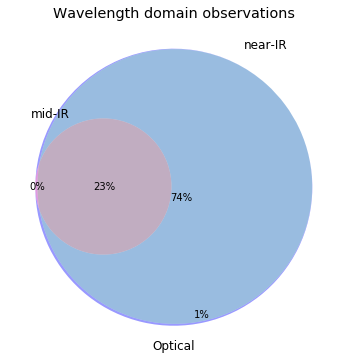

In [6]:
venn3(
    [
        np.sum(flag_obs == 4),
        np.sum(flag_obs == 2),
        np.sum(flag_obs == 6),
        np.sum(flag_obs == 1),
        np.sum(flag_obs == 5),
        np.sum(flag_obs == 3),
        np.sum(flag_obs == 7)
    ],
    set_labels=('mid-IR', 'near-IR', 'Optical' ),
    subset_label_formatter=lambda x: "{}%".format(int(100*x/len(flag_obs)))
)
plt.title("Wavelength domain observations");

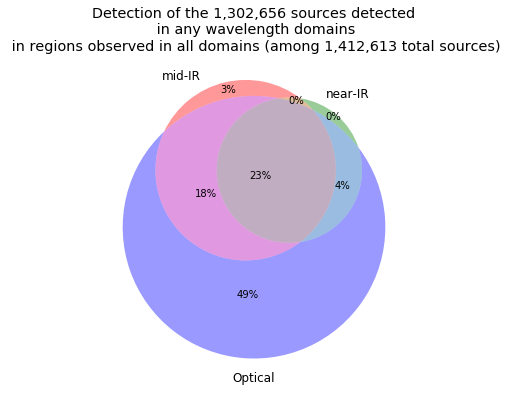

In [7]:
venn3(
    [
        np.sum(flag_det[flag_obs == 7] == 4),
        np.sum(flag_det[flag_obs == 7] == 2),
        np.sum(flag_det[flag_obs == 7] == 6),
        np.sum(flag_det[flag_obs == 7] == 1),
        np.sum(flag_det[flag_obs == 7] == 5),
        np.sum(flag_det[flag_obs == 7] == 3),
        np.sum(flag_det[flag_obs == 7] == 7)
    ],
    set_labels=('mid-IR', 'near-IR', 'Optical'),
    subset_label_formatter=lambda x: "{}%".format(int(100*x/np.sum(flag_det[flag_obs == 7] != 0)))
)
plt.title("Detection of the {} sources detected\n in any wavelength domains\n in regions observed in all domains "
          "(among {} total sources)".format(
              locale.format('%d', np.sum(flag_det != 0), grouping=True),
              locale.format('%d', len(flag_det), grouping=True)));

## II - Comparing magnitudes in similar filters

The master list if composed of several catalogues containing magnitudes in similar filters on different instruments. We are comparing the magnitudes in these corresponding filters.

In [8]:
u_bands = ["Megacam u"]
g_bands = ["Megacam g", "SUPRIME g", "GPC1 g", "90prime g"] 
r_bands = ["Megacam r", "SUPRIME r", "GPC1 r", "90prime r"]
i_bands = ["Megacam i", "SUPRIME i", "GPC1 i"]
z_bands = ["Megacam z", "SUPRIME z", "GPC1 z", "Mosaic z"]
y_bands = [             "SUPRIME y", "GPC1 y"]
j_bands = ["UKIDSS J", "WIRCAM J",  "WIRCS J", "OMEGA2000 J"]
h_bands = [            "WIRCAM H"]
k_bands = [            "WIRCAM Ks", "WIRCS K", "OMEGA2000 Ks"]
#TODO look at narrow hst bands. Also many other ugrizy bands

### II.a - Comparing depths

We compare the histograms of the total aperture magnitudes of similar bands.

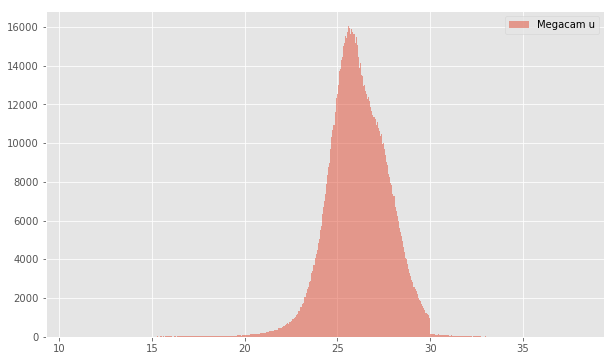

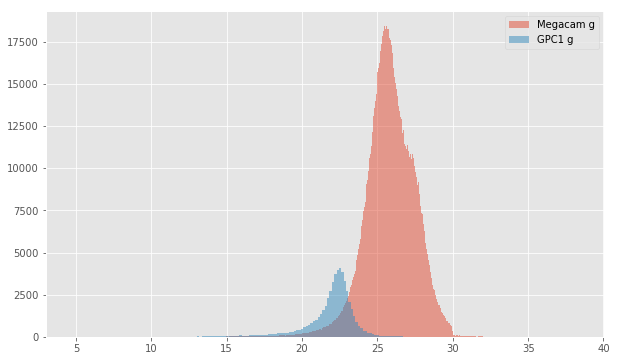

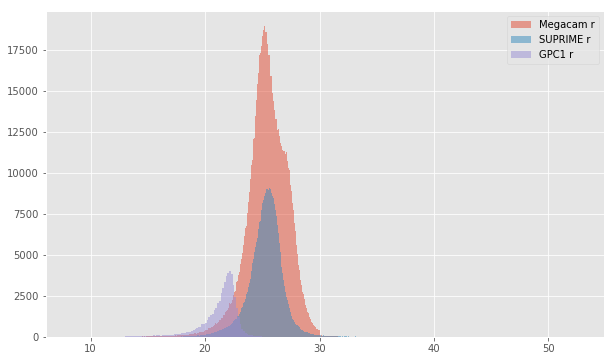

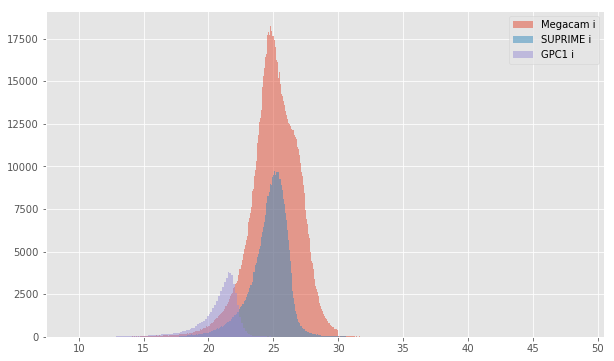

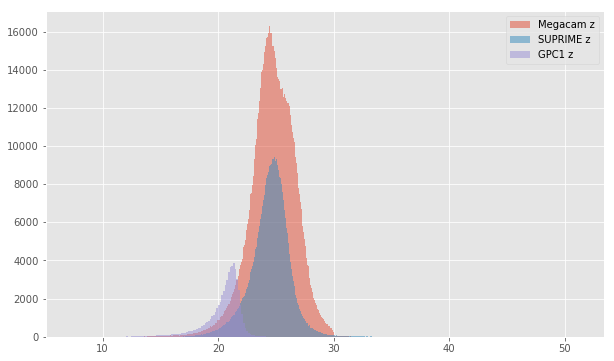

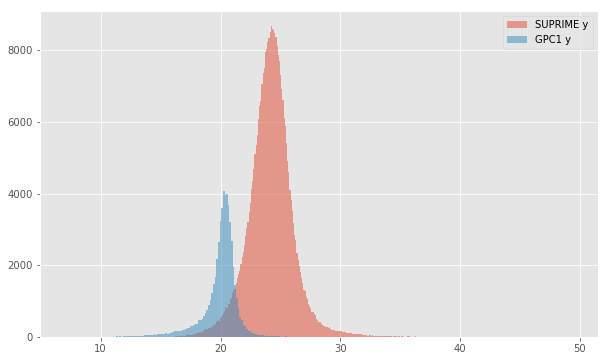

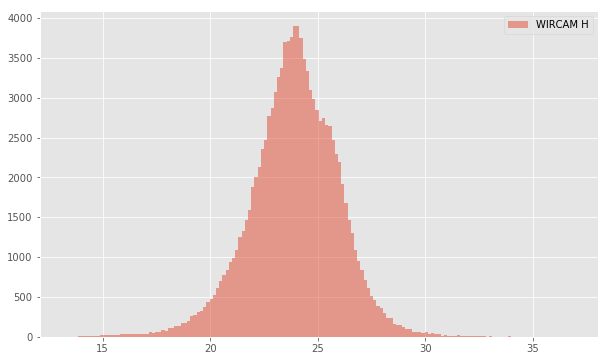

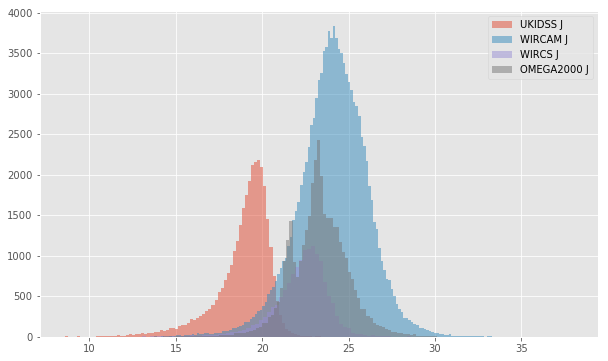

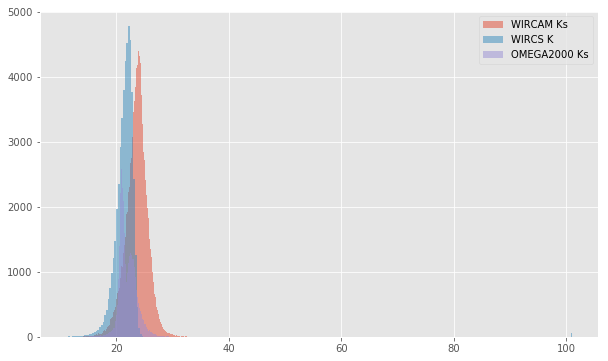

In [9]:
for bands in [u_bands, g_bands, r_bands, i_bands, z_bands, y_bands, h_bands, j_bands, k_bands]:
    colnames = ["m_{}".format(band.replace(" ", "_").lower()) for band in bands]
    nb_histograms(master_catalogue, colnames, bands)

### II.b - Comparing magnitudes

We compare one to one each magnitude in similar bands.

GPC1 g (aperture) - Megacam g (aperture):
- Median: -0.28
- Median Absolute Deviation: 0.32
- 1% percentile: -2.9472508430480957
- 99% percentile: 2.2309391975402826


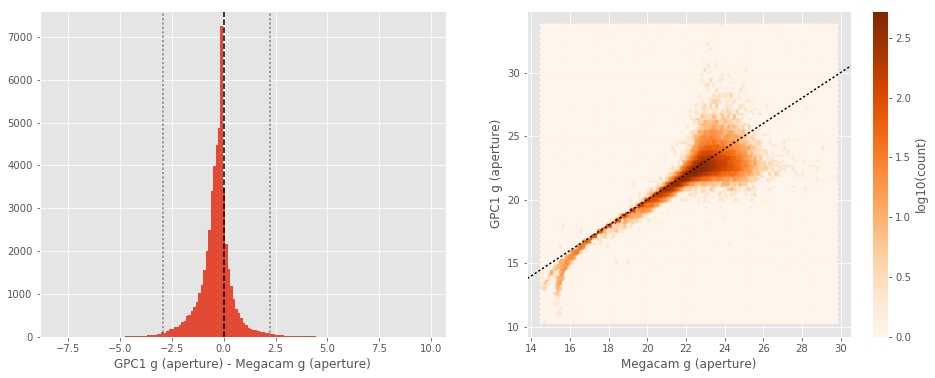

GPC1 g (total) - Megacam g (total):
- Median: -0.01
- Median Absolute Deviation: 0.27
- 1% percentile: -2.9726611137390138
- 99% percentile: 1.7023037338256806


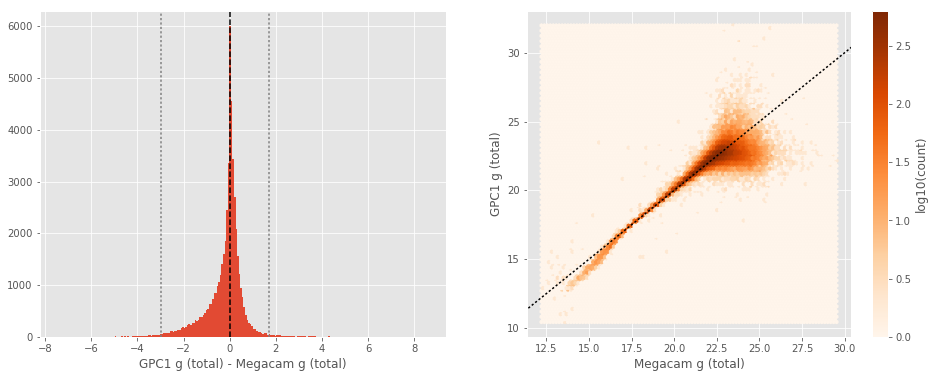

SUPRIME r (aperture) - Megacam r (aperture):
- Median: -0.01
- Median Absolute Deviation: 0.18
- 1% percentile: -1.3007946014404297
- 99% percentile: 1.773109951019285


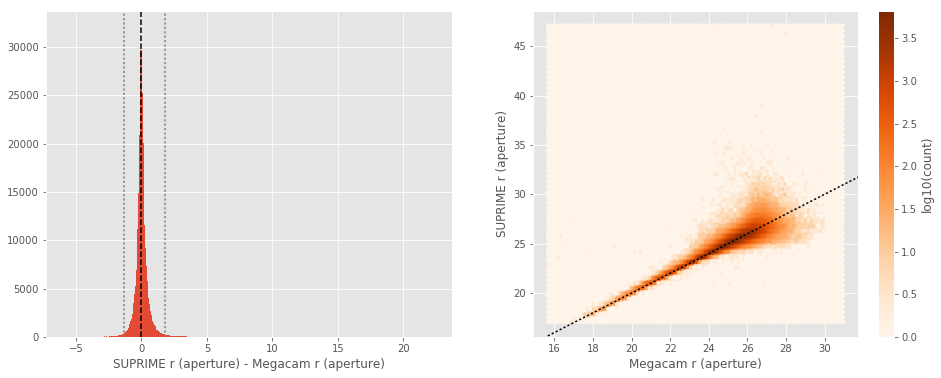

SUPRIME r (total) - Megacam r (total):
- Median: 0.01
- Median Absolute Deviation: 0.26
- 1% percentile: -2.2060433197021485
- 99% percentile: 2.455700645446777


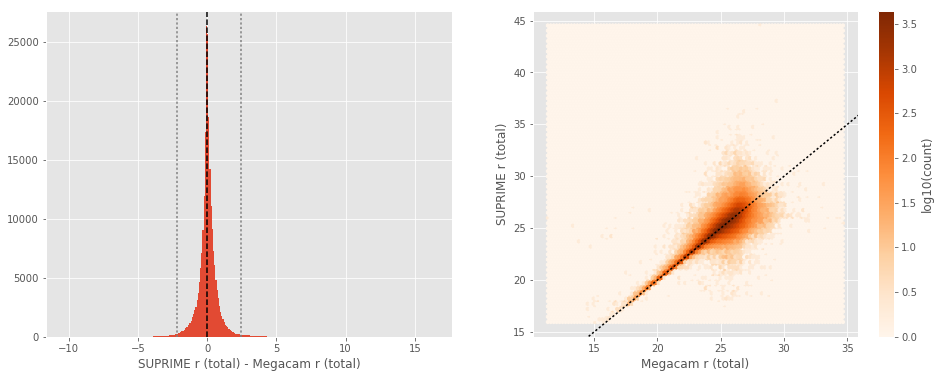

GPC1 r (aperture) - Megacam r (aperture):
- Median: -0.17
- Median Absolute Deviation: 0.17
- 1% percentile: -1.62568998336792
- 99% percentile: 1.2671497344970688


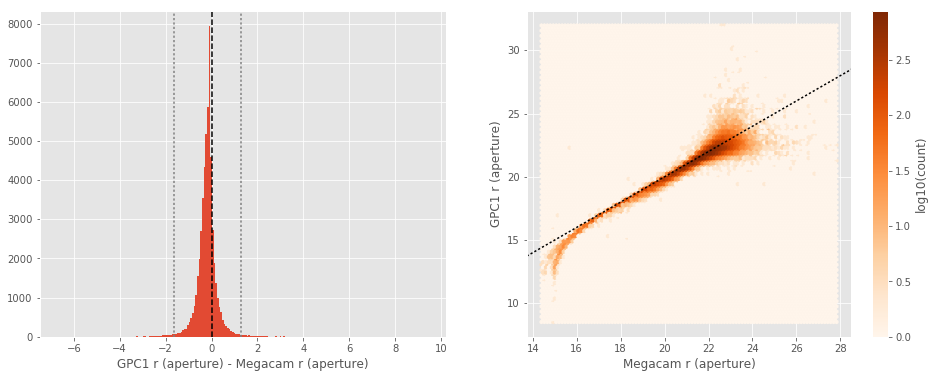

GPC1 r (total) - Megacam r (total):
- Median: 0.08
- Median Absolute Deviation: 0.14
- 1% percentile: -1.6144099235534668
- 99% percentile: 1.0029862403869614


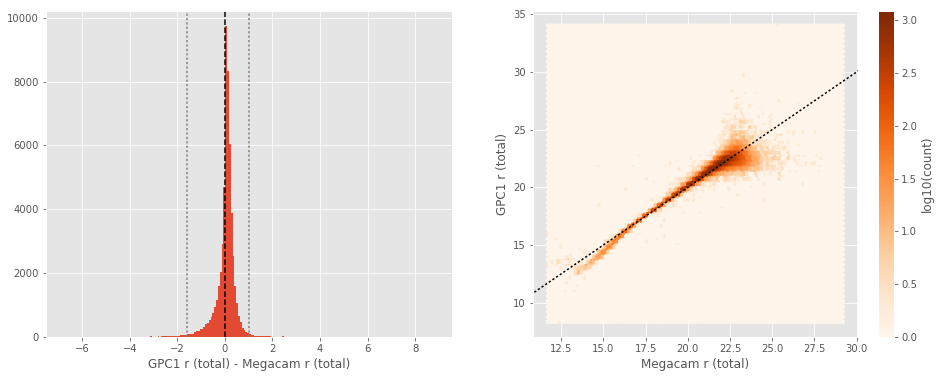

GPC1 r (aperture) - SUPRIME r (aperture):
- Median: -0.20
- Median Absolute Deviation: 0.25
- 1% percentile: -1.6588865661621093
- 99% percentile: 1.2223485565185546


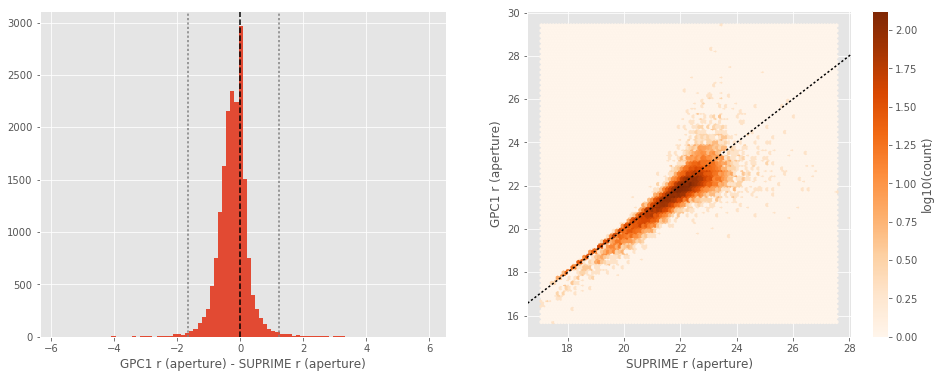

GPC1 r (total) - SUPRIME r (total):
- Median: 0.09
- Median Absolute Deviation: 0.15
- 1% percentile: -1.813418197631836
- 99% percentile: 0.9431716918945315


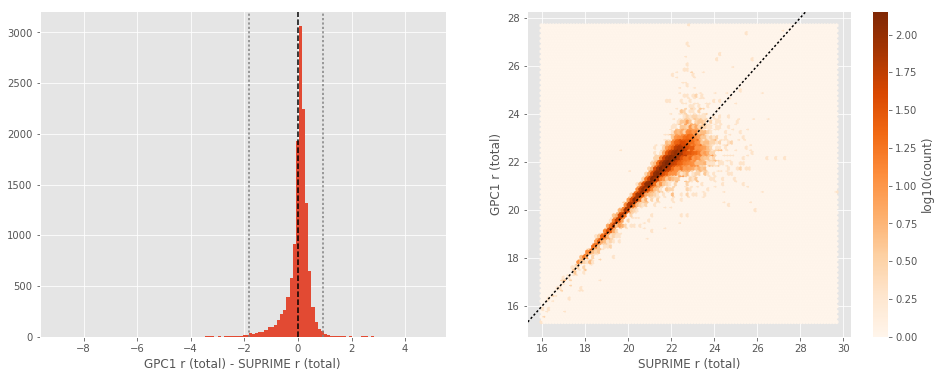

SUPRIME i (aperture) - Megacam i (aperture):
- Median: -0.02
- Median Absolute Deviation: 0.16
- 1% percentile: -1.4580886840820313
- 99% percentile: 1.3433338165283222


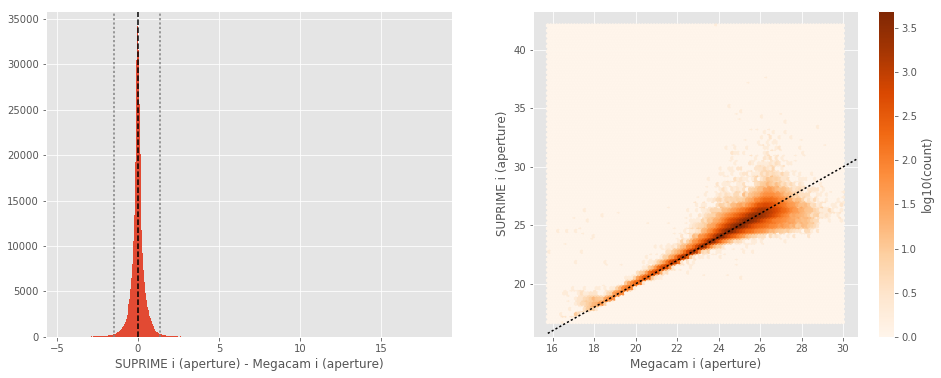

SUPRIME i (total) - Megacam i (total):
- Median: -0.07
- Median Absolute Deviation: 0.21
- 1% percentile: -2.2117546081542967
- 99% percentile: 2.071892547607423


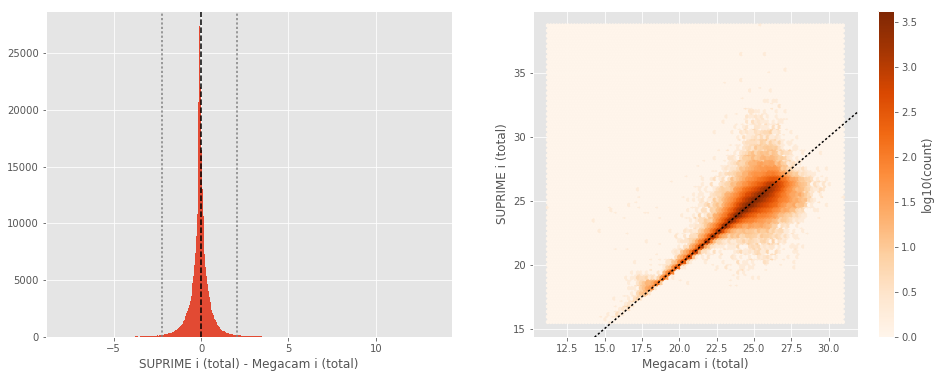

GPC1 i (aperture) - Megacam i (aperture):
- Median: -0.08
- Median Absolute Deviation: 0.12
- 1% percentile: -1.0892204284667968
- 99% percentile: 0.7077011108398423


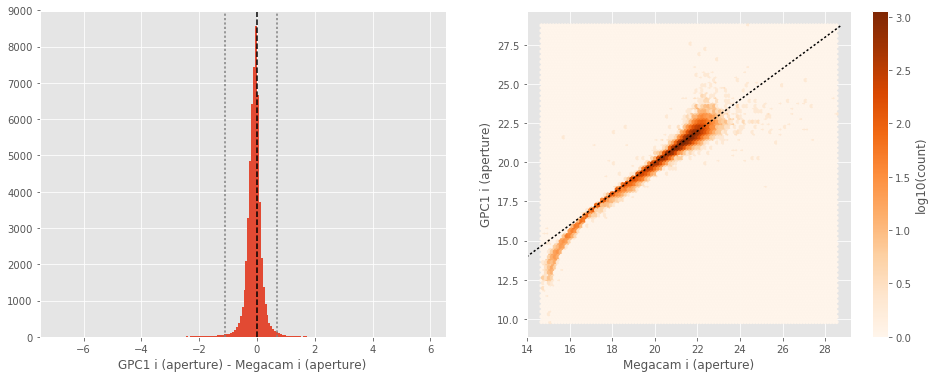

GPC1 i (total) - Megacam i (total):
- Median: 0.14
- Median Absolute Deviation: 0.09
- 1% percentile: -0.8035373115539551
- 99% percentile: 0.7253468513488748


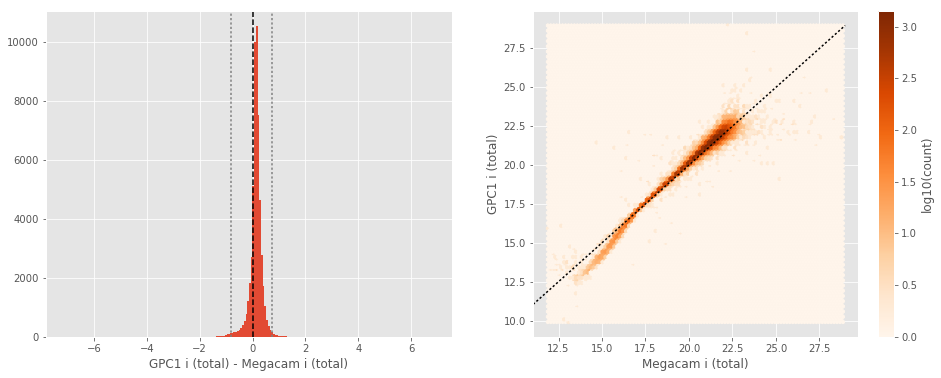

GPC1 i (aperture) - SUPRIME i (aperture):
- Median: -0.11
- Median Absolute Deviation: 0.20
- 1% percentile: -1.2585309600830077
- 99% percentile: 0.7960177612304704


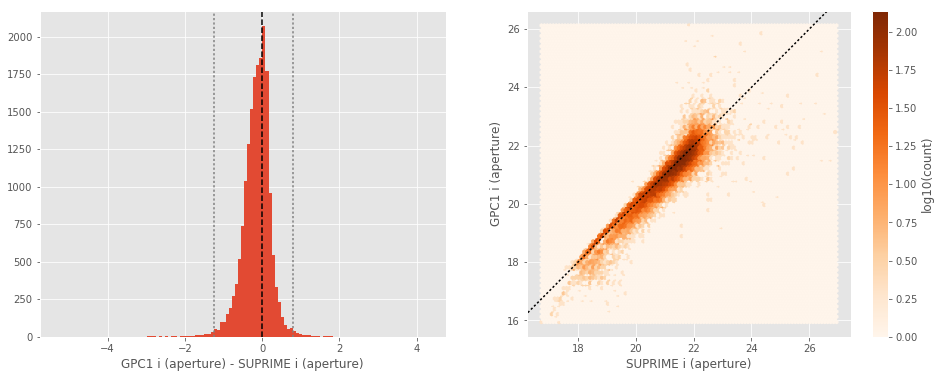

GPC1 i (total) - SUPRIME i (total):
- Median: 0.19
- Median Absolute Deviation: 0.11
- 1% percentile: -1.0757511711120604
- 99% percentile: 0.734667930603025


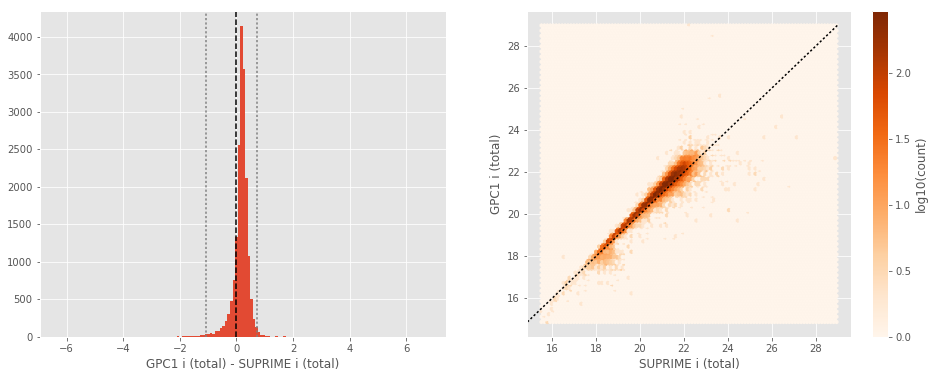

SUPRIME z (aperture) - Megacam z (aperture):
- Median: -0.04
- Median Absolute Deviation: 0.25
- 1% percentile: -2.159938545227051
- 99% percentile: 2.59332706451416


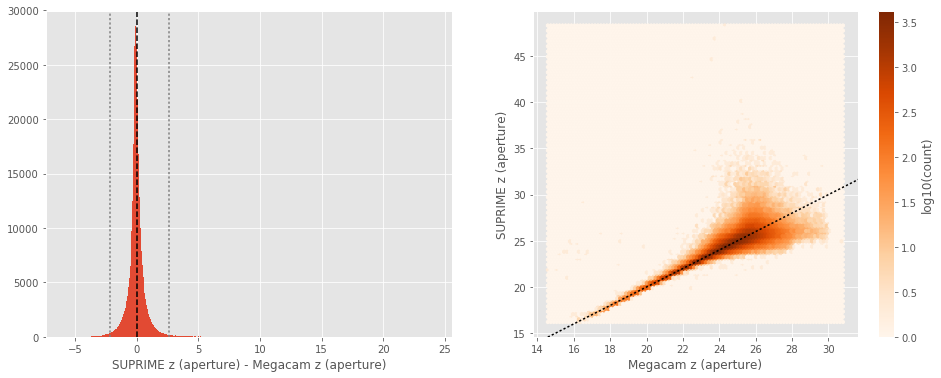

SUPRIME z (total) - Megacam z (total):
- Median: -0.03
- Median Absolute Deviation: 0.31
- 1% percentile: -2.6480859756469726
- 99% percentile: 2.7384426689147947


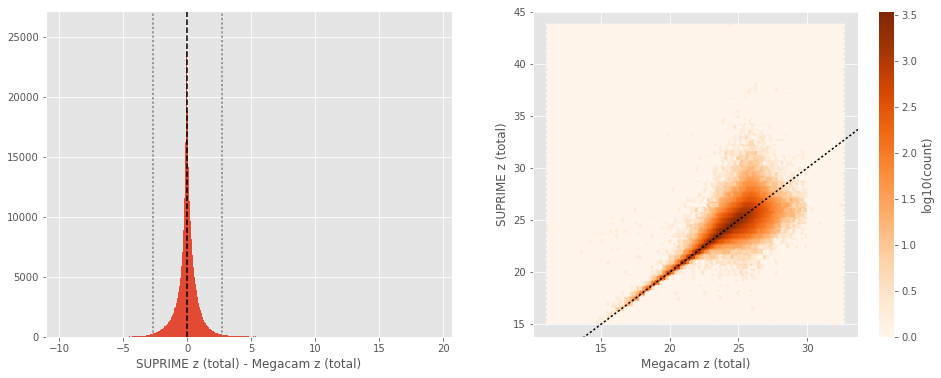

GPC1 z (aperture) - Megacam z (aperture):
- Median: -0.13
- Median Absolute Deviation: 0.12
- 1% percentile: -1.0188804626464845
- 99% percentile: 0.8210201263427732


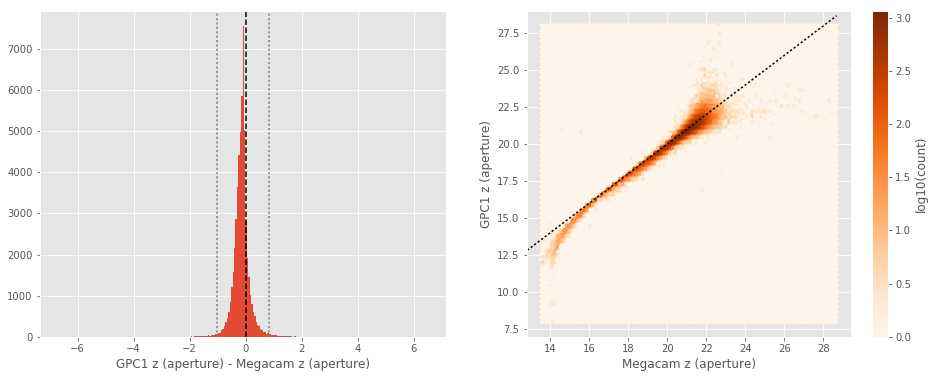

GPC1 z (total) - Megacam z (total):
- Median: 0.09
- Median Absolute Deviation: 0.11
- 1% percentile: -0.8405802231147743
- 99% percentile: 0.7753526496887206


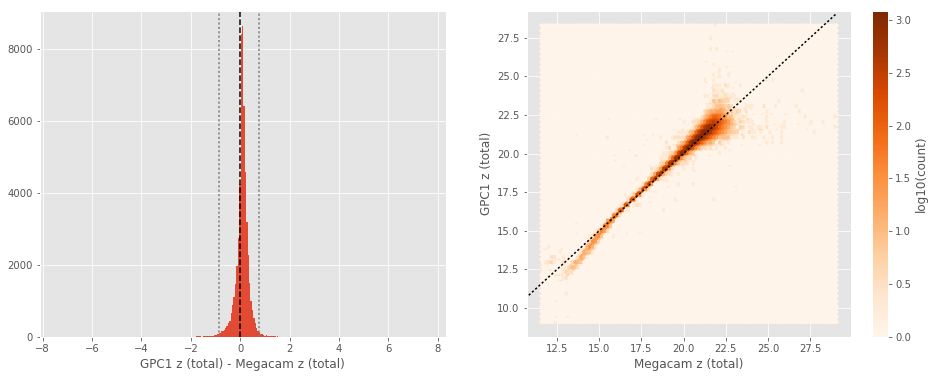

GPC1 z (aperture) - SUPRIME z (aperture):
- Median: -0.10
- Median Absolute Deviation: 0.21
- 1% percentile: -1.1059716796874999
- 99% percentile: 0.9145635223388655


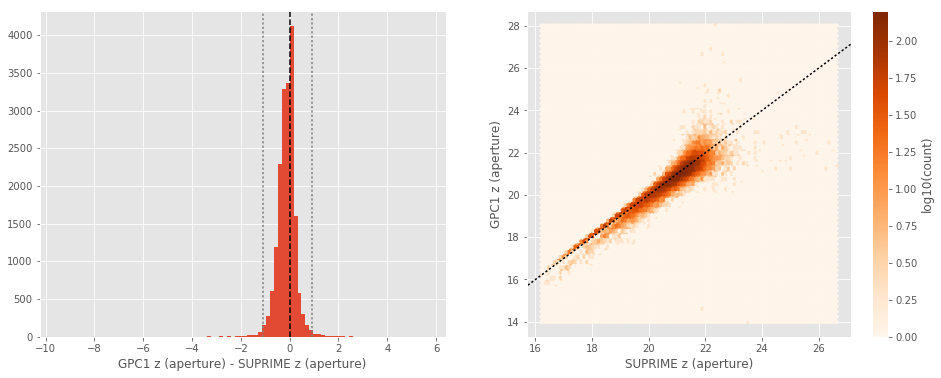

GPC1 z (total) - SUPRIME z (total):
- Median: 0.14
- Median Absolute Deviation: 0.12
- 1% percentile: -0.9915233230590821
- 99% percentile: 0.8064051818847633


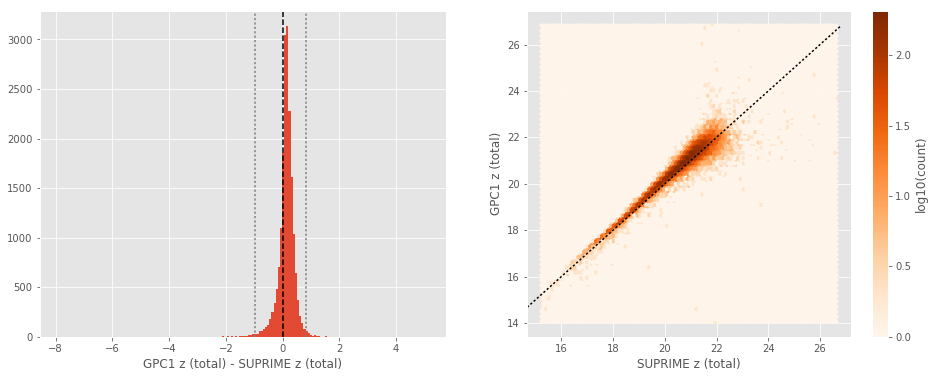

GPC1 y (aperture) - SUPRIME y (aperture):
- Median: -0.24
- Median Absolute Deviation: 0.31
- 1% percentile: -2.071452808380127
- 99% percentile: 1.7521905326843257


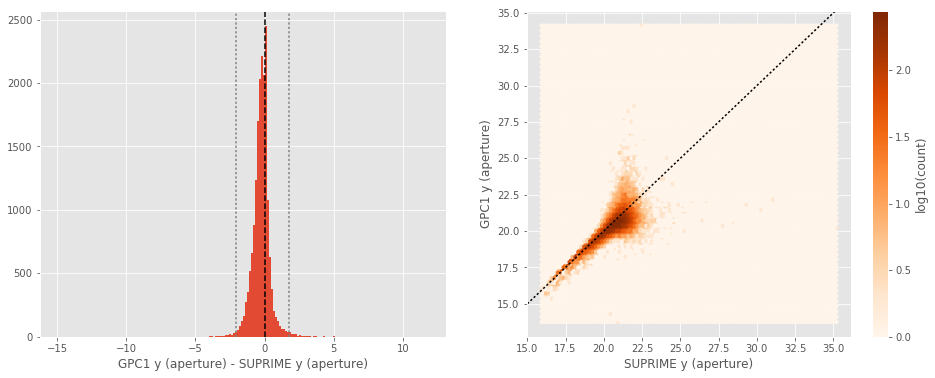

GPC1 y (total) - SUPRIME y (total):
- Median: 0.05
- Median Absolute Deviation: 0.28
- 1% percentile: -2.2786521530151367
- 99% percentile: 1.549367561340333


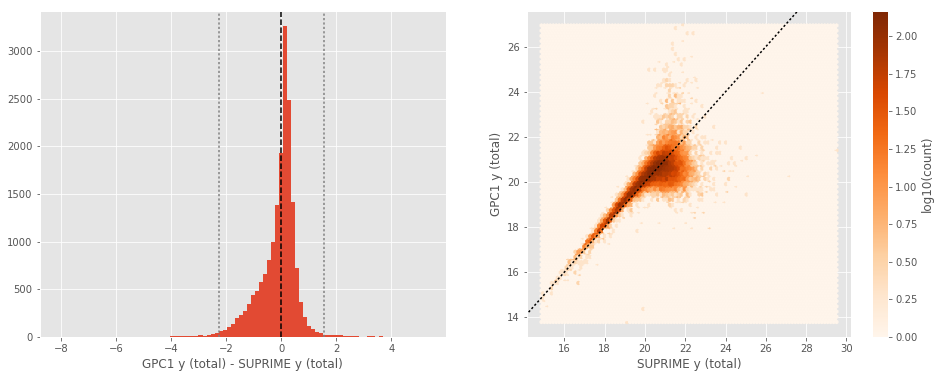

In [10]:
for band_of_a_kind in [u_bands, g_bands, r_bands, i_bands, z_bands, y_bands, h_bands, j_bands, k_bands]:
    for band1, band2 in itertools.combinations(band_of_a_kind, 2):
        
        basecol1, basecol2 = band1.replace(" ", "_").lower(), band2.replace(" ", "_").lower()
        
        if ('omega2000' not in basecol1) & ('omega2000' not in basecol2):
            col1, col2 = "m_ap_{}".format(basecol1), "m_ap_{}".format(basecol2)
            nb_compare_mags(master_catalogue[col1], master_catalogue[col2], 
                            labels=("{} (aperture)".format(band1), "{} (aperture)".format(band2)))
        
        col1, col2 = "m_{}".format(basecol1), "m_{}".format(basecol2)
        nb_compare_mags(master_catalogue[col1], master_catalogue[col2], 
                        labels=("{} (total)".format(band1), "{} (total)".format(band2)))

## III - Comparing magnitudes to reference bands

Cross-match the master list to SDSS and 2MASS to compare its magnitudes to SDSS and 2MASS ones.

In [11]:
master_catalogue_coords = SkyCoord(master_catalogue['ra'], master_catalogue['dec'])

### III.a - Comparing u, g, r, i, and z bands to SDSS

The catalogue is cross-matched to SDSS-DR13 withing 0.2 arcsecond. 

We compare the u, g, r, i, and z magnitudes to those from SDSS using `fiberMag` for the aperture magnitude and `petroMag`  for the total magnitude.

In [12]:
sdss = Table.read("../../dmu0/dmu0_SDSS-DR13/data/SDSS-DR13_EGS.fits")
sdss_coords = SkyCoord(sdss['ra'] * u.deg, sdss['dec'] * u.deg)

idx, d2d, _ = sdss_coords.match_to_catalog_sky(master_catalogue_coords)
mask = (d2d < 0.2 * u.arcsec)

sdss = sdss[mask]
ml_sdss_idx = idx[mask]

Megacam u (aperture) - SDSS u (fiberMag):
- Median: -0.16
- Median Absolute Deviation: 0.49
- 1% percentile: -1.9366635704040527
- 99% percentile: 3.1243225669860886


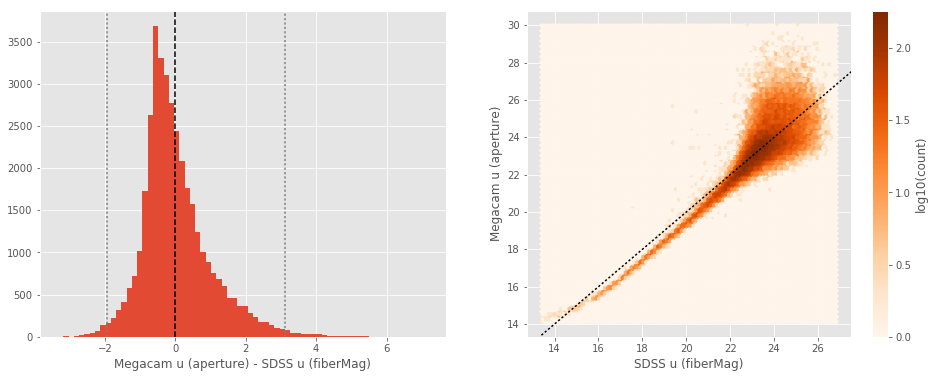

Megacam u (total) - SDSS u (petroMag):
- Median: -0.16
- Median Absolute Deviation: 0.49
- 1% percentile: -1.9366635704040527
- 99% percentile: 3.1243225669860886


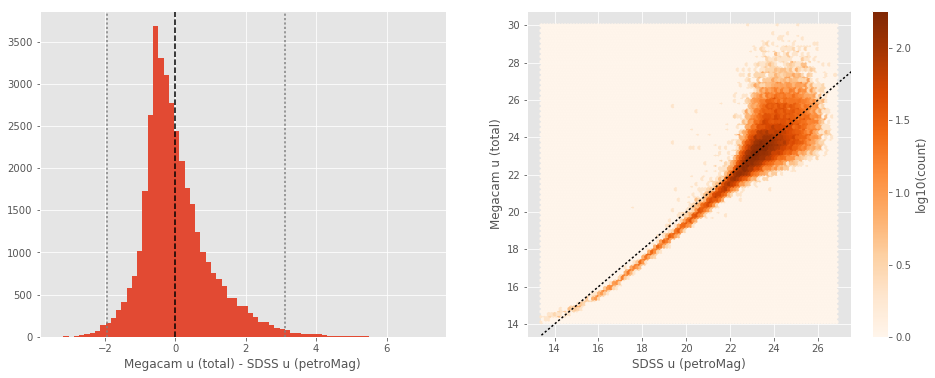

Megacam g (aperture) - SDSS g (fiberMag):
- Median: -0.34
- Median Absolute Deviation: 0.12
- 1% percentile: -1.1357846069335937
- 99% percentile: 0.7837402153015139


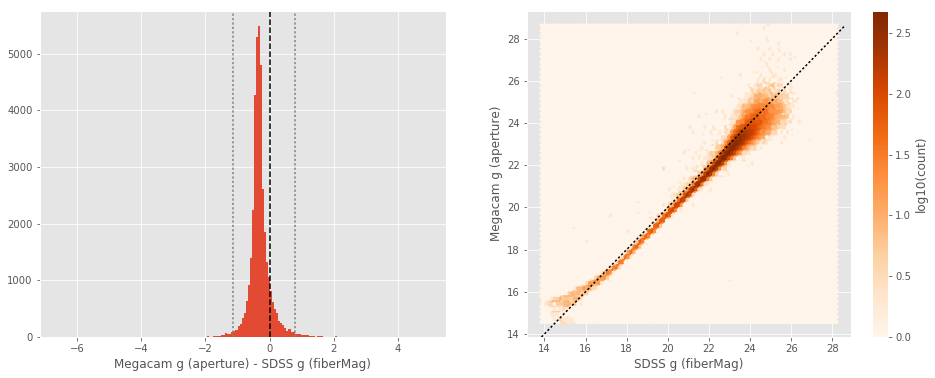

Megacam g (total) - SDSS g (petroMag):
- Median: -0.34
- Median Absolute Deviation: 0.12
- 1% percentile: -1.1357846069335937
- 99% percentile: 0.7837402153015139


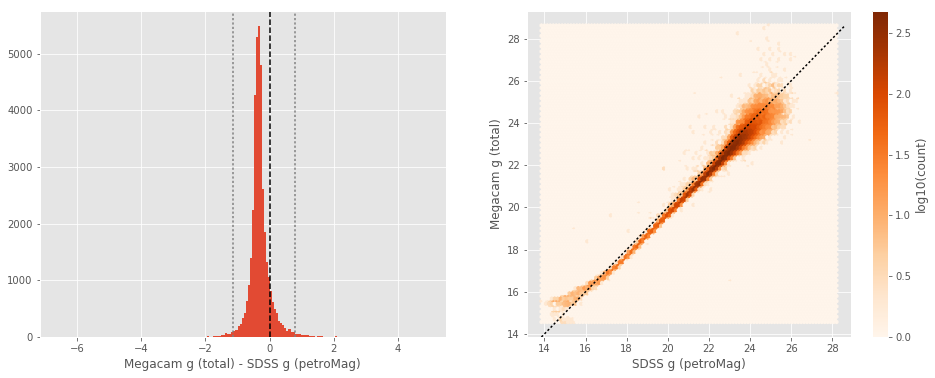

GPC1 g (aperture) - SDSS g (fiberMag):
- Median: -0.58
- Median Absolute Deviation: 0.27
- 1% percentile: -2.649733161926269
- 99% percentile: 1.7384460449218742


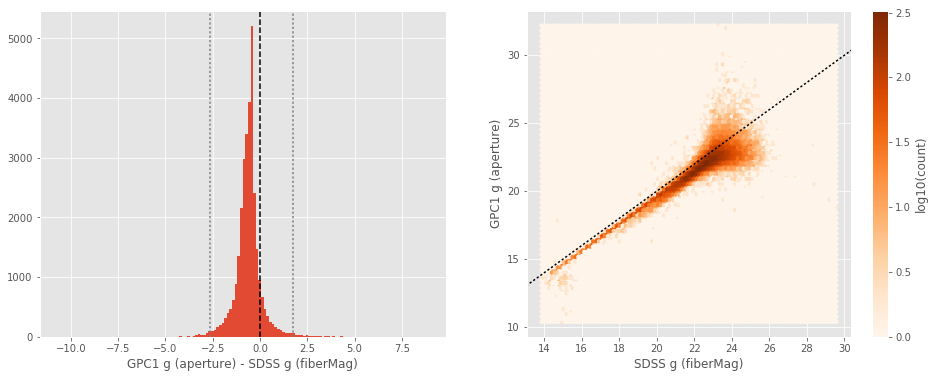

GPC1 g (total) - SDSS g (petroMag):
- Median: -0.58
- Median Absolute Deviation: 0.27
- 1% percentile: -2.649733161926269
- 99% percentile: 1.7384460449218742


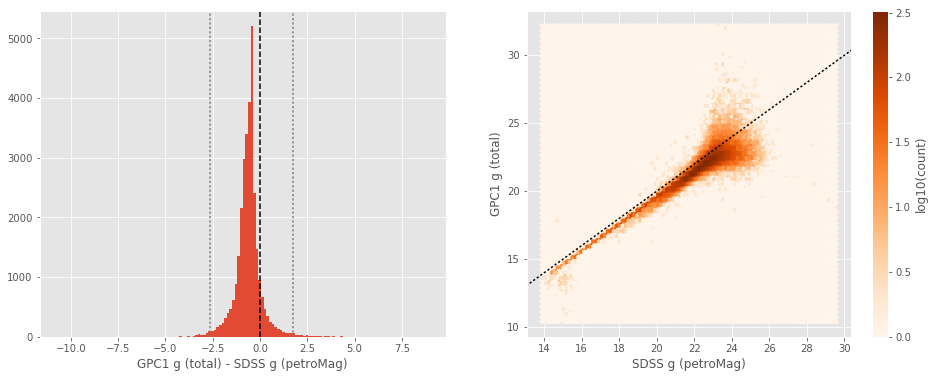

Megacam r (aperture) - SDSS r (fiberMag):
- Median: -0.28
- Median Absolute Deviation: 0.07
- 1% percentile: -0.9402611541748047
- 99% percentile: 0.4672513961791987


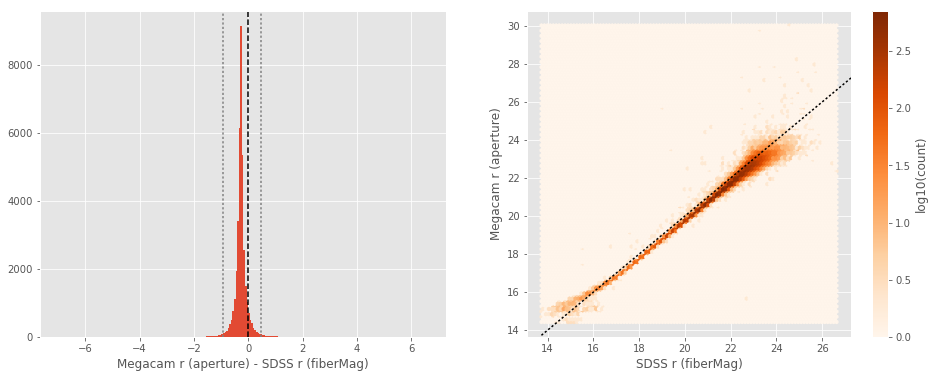

Megacam r (total) - SDSS r (petroMag):
- Median: -0.28
- Median Absolute Deviation: 0.07
- 1% percentile: -0.9402611541748047
- 99% percentile: 0.4672513961791987


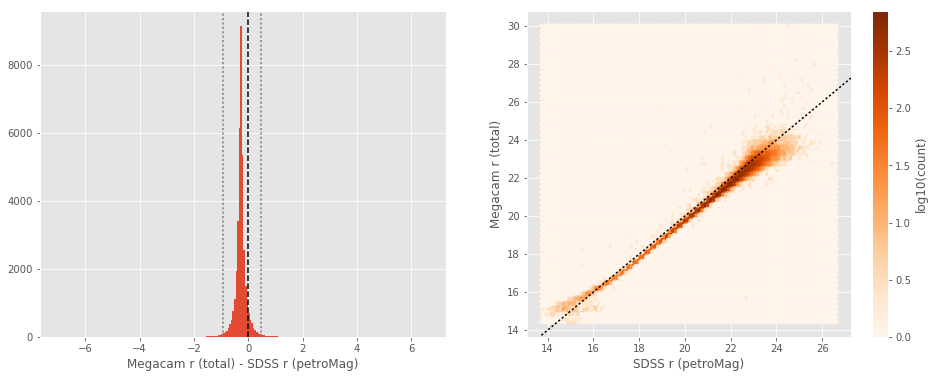

SUPRIME r (aperture) - SDSS r (fiberMag):
- Median: -0.27
- Median Absolute Deviation: 0.12
- 1% percentile: -0.9828863334655762
- 99% percentile: 0.5160082817077647


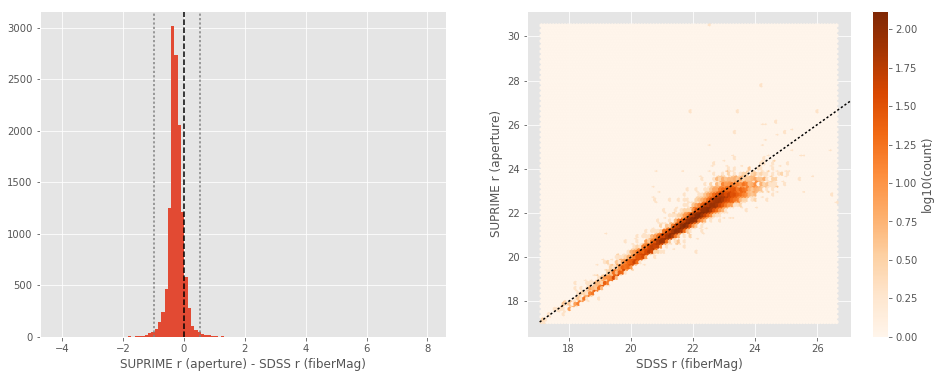

SUPRIME r (total) - SDSS r (petroMag):
- Median: -0.27
- Median Absolute Deviation: 0.12
- 1% percentile: -0.9828863334655762
- 99% percentile: 0.5160082817077647


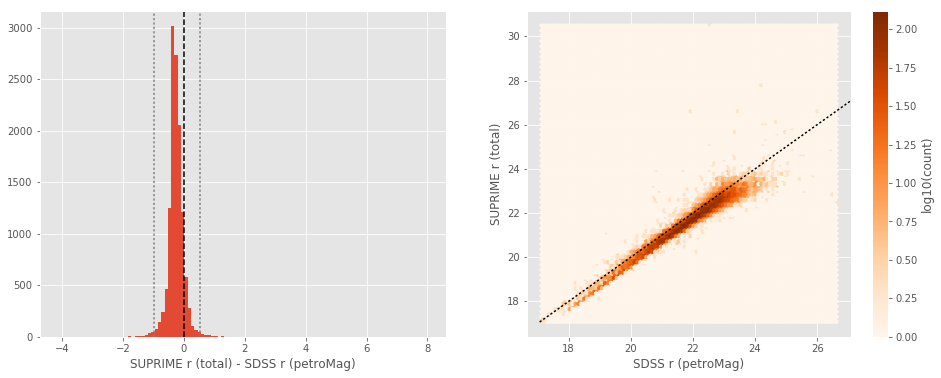

GPC1 r (aperture) - SDSS r (fiberMag):
- Median: -0.43
- Median Absolute Deviation: 0.15
- 1% percentile: -1.5799267196655273
- 99% percentile: 0.7769848442077639


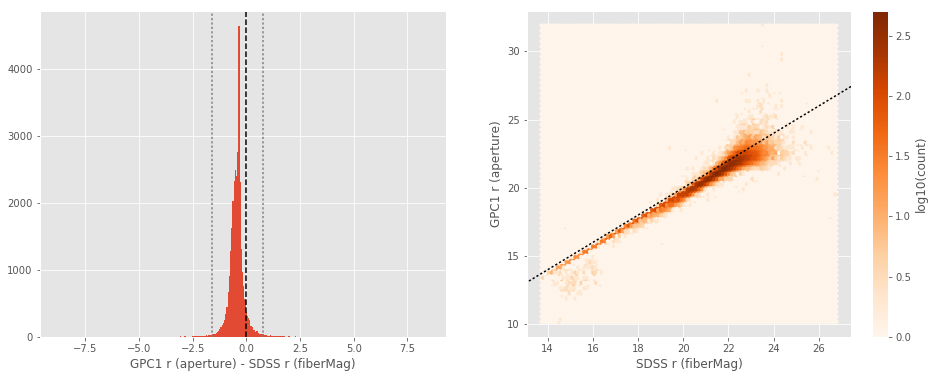

GPC1 r (total) - SDSS r (petroMag):
- Median: -0.43
- Median Absolute Deviation: 0.15
- 1% percentile: -1.5799267196655273
- 99% percentile: 0.7769848442077639


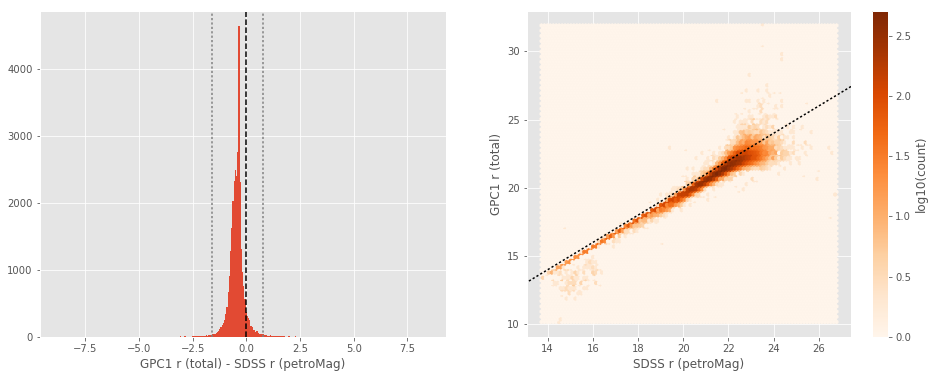

Megacam i (aperture) - SDSS i (fiberMag):
- Median: -0.33
- Median Absolute Deviation: 0.08
- 1% percentile: -0.9073835754394531
- 99% percentile: 0.5248305892944336


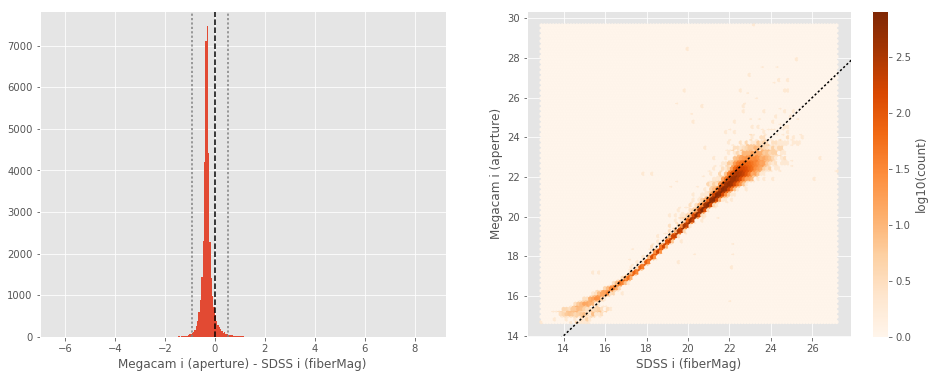

Megacam i (total) - SDSS i (petroMag):
- Median: -0.33
- Median Absolute Deviation: 0.08
- 1% percentile: -0.9073835754394531
- 99% percentile: 0.5248305892944336


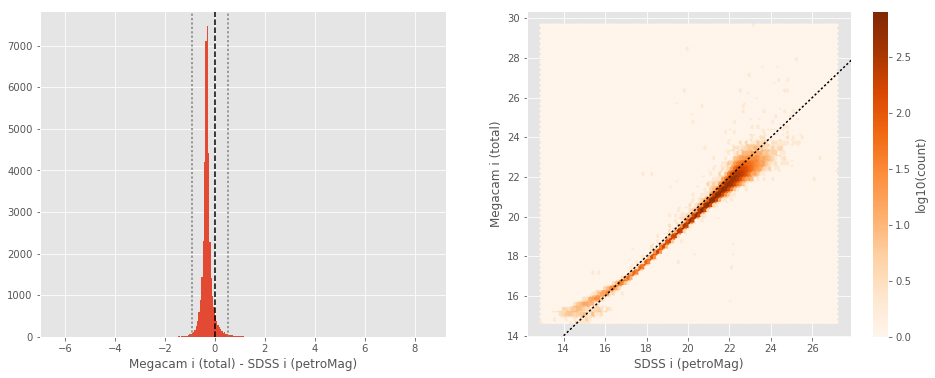

SUPRIME i (aperture) - SDSS i (fiberMag):
- Median: -0.31
- Median Absolute Deviation: 0.12
- 1% percentile: -0.9429589080810548
- 99% percentile: 0.5862416458129882


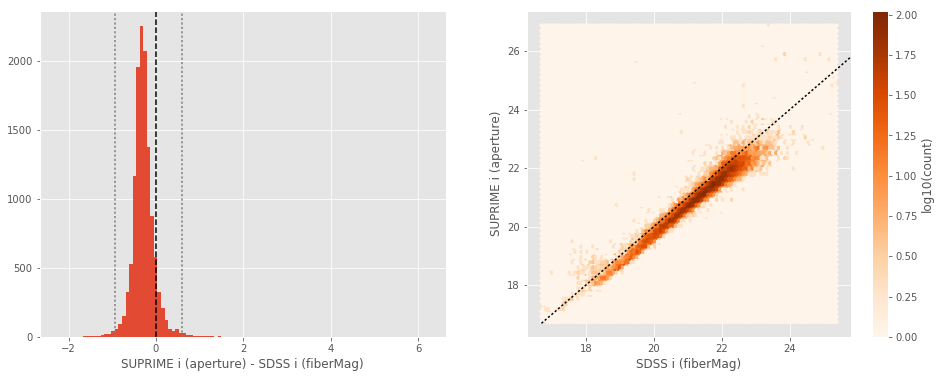

SUPRIME i (total) - SDSS i (petroMag):
- Median: -0.31
- Median Absolute Deviation: 0.12
- 1% percentile: -0.9429589080810548
- 99% percentile: 0.5862416458129882


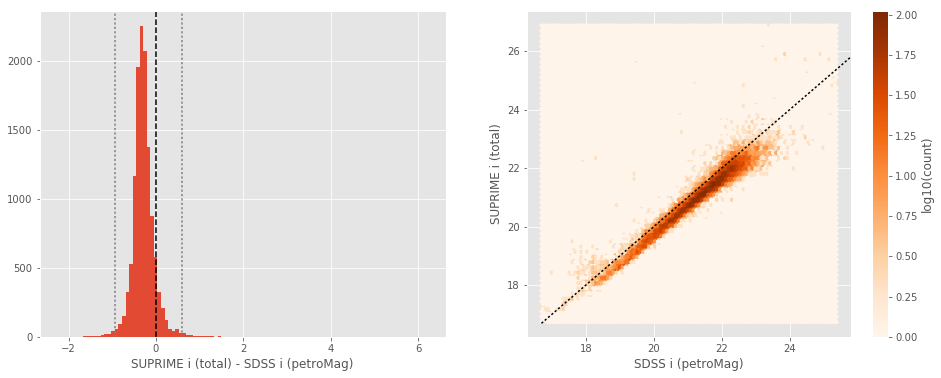

GPC1 i (aperture) - SDSS i (fiberMag):
- Median: -0.41
- Median Absolute Deviation: 0.11
- 1% percentile: -1.0385213470458985
- 99% percentile: 0.2873053741455075


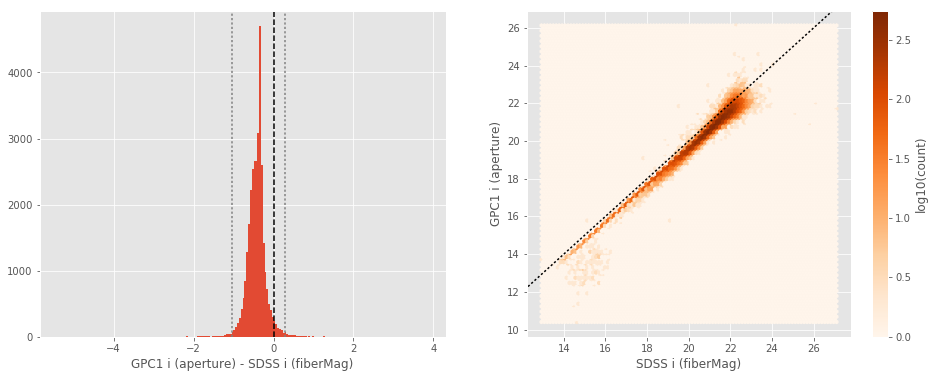

GPC1 i (total) - SDSS i (petroMag):
- Median: -0.41
- Median Absolute Deviation: 0.11
- 1% percentile: -1.0385213470458985
- 99% percentile: 0.2873053741455075


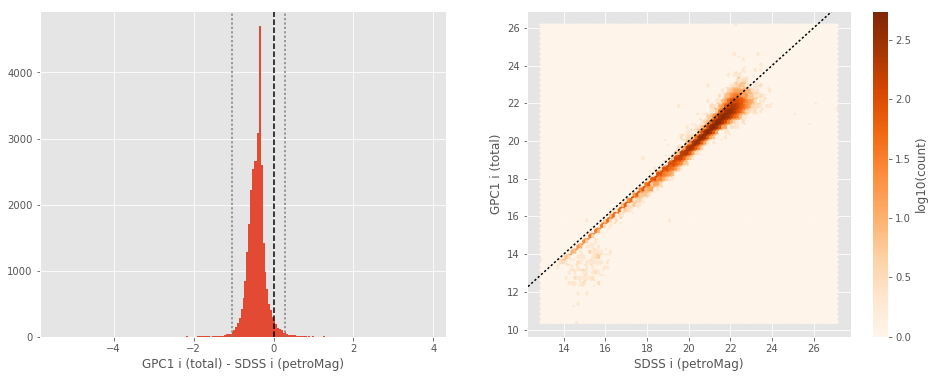

Megacam z (aperture) - SDSS z (fiberMag):
- Median: -0.18
- Median Absolute Deviation: 0.14
- 1% percentile: -1.1557494163513184
- 99% percentile: 1.0748854446411142


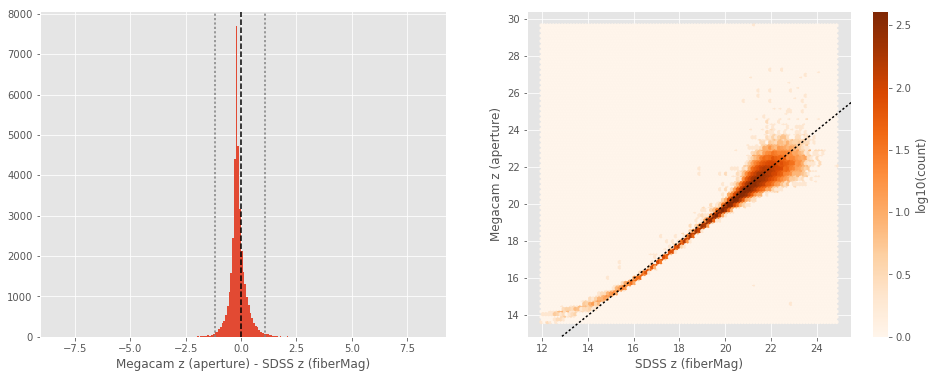

Megacam z (total) - SDSS z (petroMag):
- Median: -0.18
- Median Absolute Deviation: 0.14
- 1% percentile: -1.1557494163513184
- 99% percentile: 1.0748854446411142


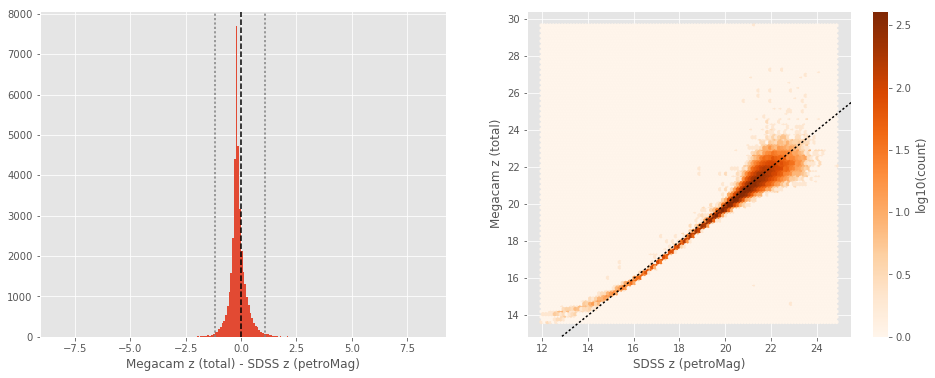

SUPRIME z (aperture) - SDSS z (fiberMag):
- Median: -0.20
- Median Absolute Deviation: 0.19
- 1% percentile: -1.1774482727050781
- 99% percentile: 0.8522415161132812


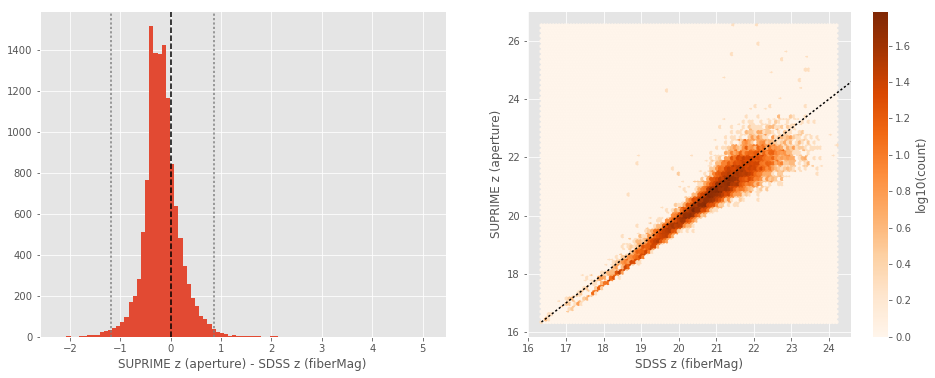

SUPRIME z (total) - SDSS z (petroMag):
- Median: -0.20
- Median Absolute Deviation: 0.19
- 1% percentile: -1.1774482727050781
- 99% percentile: 0.8522415161132812


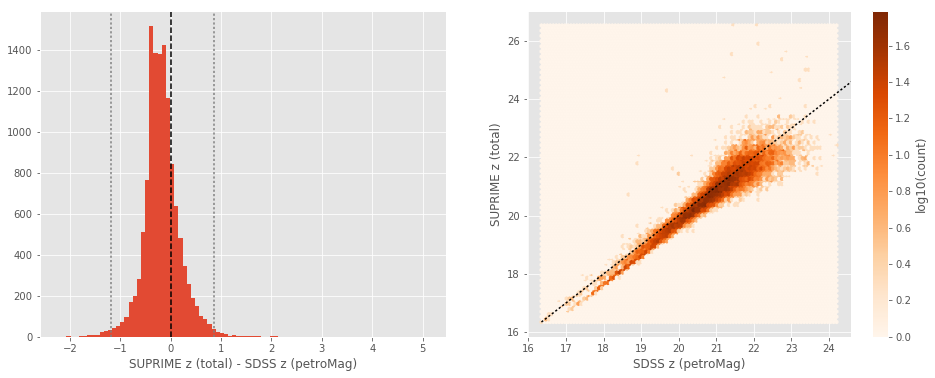

GPC1 z (aperture) - SDSS z (fiberMag):
- Median: -0.33
- Median Absolute Deviation: 0.16
- 1% percentile: -1.3514610290527345
- 99% percentile: 0.7569400787353526


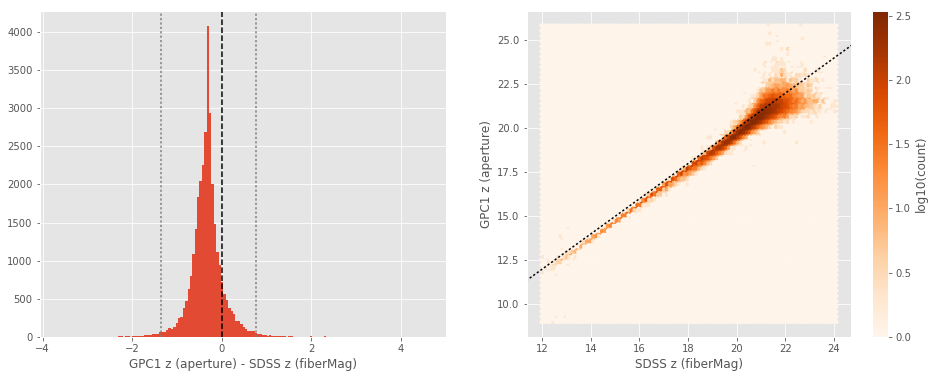

GPC1 z (total) - SDSS z (petroMag):
- Median: -0.33
- Median Absolute Deviation: 0.16
- 1% percentile: -1.3514610290527345
- 99% percentile: 0.7569400787353526


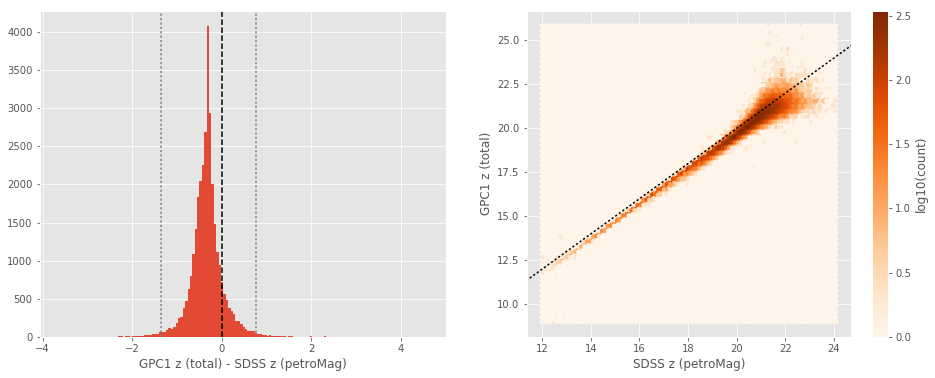

In [13]:
for band_of_a_kind in [u_bands, g_bands, r_bands, i_bands, z_bands]:
    for band in band_of_a_kind:
        
        sdss_mag_ap = sdss["fiberMag_{}".format(band[-1])]
        master_cat_mag_ap = master_catalogue["m_ap_{}".format(band.replace(" ", "_").lower())][ml_sdss_idx]
    
        nb_compare_mags(sdss_mag_ap, master_cat_mag_ap,
                        labels=("SDSS {} (fiberMag)".format(band[-1]), "{} (aperture)".format(band)))
    
        sdss_mag_tot = sdss["petroMag_{}".format(band[-1])]
        master_cat_mag_tot = master_catalogue["m_{}".format(band.replace(" ", "_").lower())][ml_sdss_idx]
        
        nb_compare_mags(sdss_mag_tot, master_cat_mag_tot,
                        labels=("SDSS {} (petroMag)".format(band[-1]), "{} (total)".format(band)))

### III.b - Comparing J and K bands to 2MASS

The catalogue is cross-matched to 2MASS-PSC withing 0.2 arcsecond. We compare the WIRCAM total J and K magnitudes to those from 2MASS.

The 2MASS magnitudes are “*Vega-like*” and we have to convert them to AB magnitudes using the zero points provided on [this page](http://www.ipac.caltech.edu/2mass/releases/allsky/doc/sec6_4a.html):

| Band | Fν - 0 mag (Jy) |
|------|-----------------|
| J    | 1594            |
| H    | 1024            |
| Ks   | 666.7           |

2MASS and WIRCAM both use Ks so no conversion is required.

In [14]:
# The AB zero point is 3631 Jy
j_2mass_to_ab = 2.5 * np.log10(3631/1595)
k_2mass_to_ab = 2.5 * np.log10(3631/666.7)

In [15]:
twomass = Table.read("../../dmu0/dmu0_2MASS-point-sources/data/2MASS-PSC_EGS.fits")
twomass_coords = SkyCoord(twomass['raj2000'], twomass['dej2000'])

idx, d2d, _ = twomass_coords.match_to_catalog_sky(master_catalogue_coords)
mask = (d2d < 0.2 * u.arcsec)

twomass = twomass[mask]
ml_twomass_idx = idx[mask]

WIRCAM J (total) - 2MASS J:
- Median: 0.00
- Median Absolute Deviation: 0.09
- 1% percentile: -1.0202204724027446
- 99% percentile: 3.129319943551843


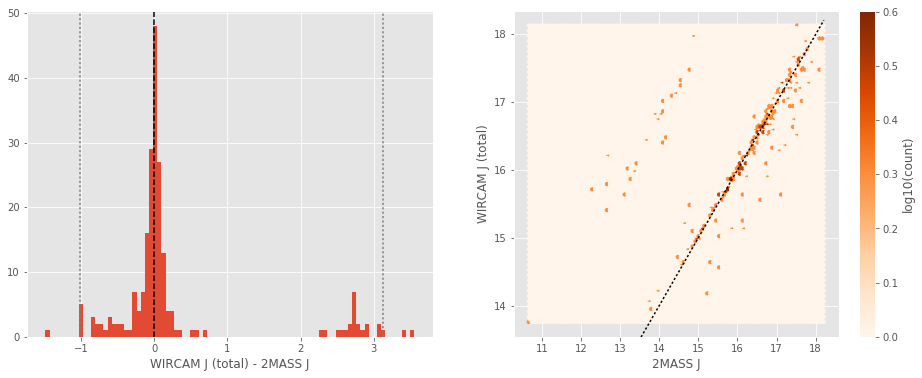

In [16]:
nb_compare_mags(twomass['jmag'] + j_2mass_to_ab, master_catalogue['m_wircam_j'][ml_twomass_idx],
                labels=("2MASS J", "WIRCAM J (total)"))

WIRCAM Ks (total) - 2MASS Ks:
- Median: -0.00
- Median Absolute Deviation: 0.10
- 1% percentile: -1.0586832237871677
- 99% percentile: 2.5413844028607815


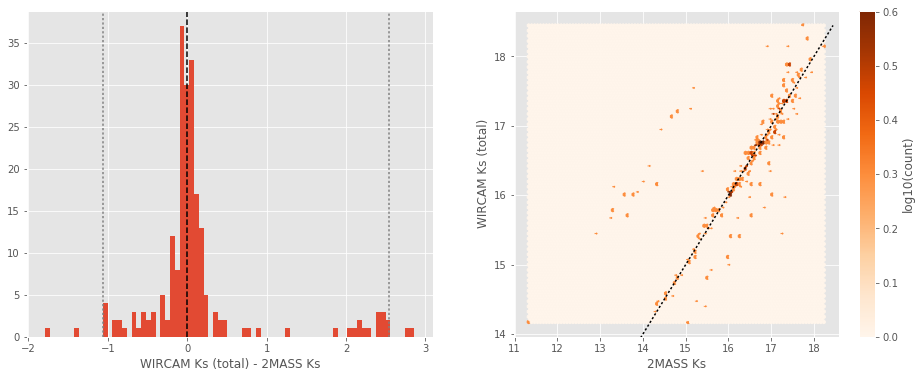

In [17]:
nb_compare_mags(twomass['kmag'] + k_2mass_to_ab, master_catalogue['m_wircam_ks'][ml_twomass_idx],
                labels=("2MASS Ks", "WIRCAM Ks (total)"))

## Keeping only sources with good signal to noise ratio

From here, we are only comparing sources with a signal to noise ratio above 3, i.e. roughly we a magnitude error below 0.3.

*To make it easier, we are setting to NaN in the catalogue the magnitudes associated with an error above 0.3 so we can't use these magnitudes after the next cell.*

In [18]:
for error_column in [_ for _ in master_catalogue.colnames if _.startswith('merr_')]:
    column = error_column.replace("merr", "m")
    keep_mask = np.isfinite(master_catalogue[error_column])
    keep_mask[keep_mask] &= master_catalogue[keep_mask][error_column] <= 0.3
    master_catalogue[column][~keep_mask] = np.nan

## IV - Comparing aperture magnitudes to total ones.

Number of source used: 830349 / 1412613 (58.78%)


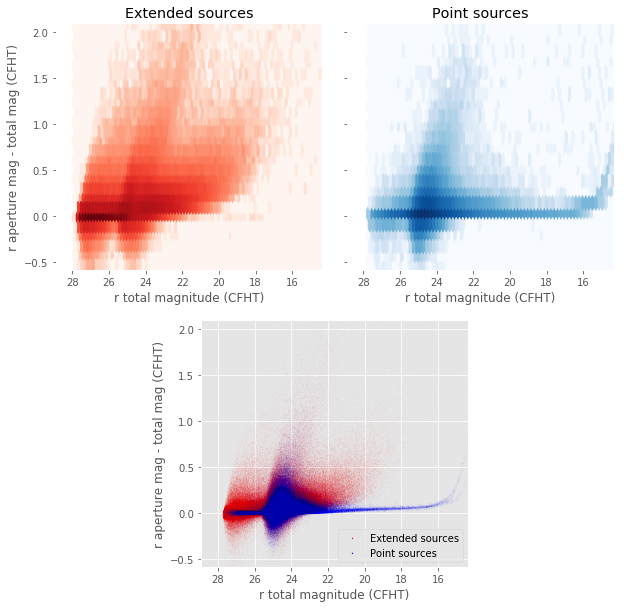

In [19]:
nb_ccplots(
    master_catalogue['m_megacam_r'],
    master_catalogue['m_ap_megacam_r'] - master_catalogue['m_megacam_r'],
    "r total magnitude (CFHT)", "r aperture mag - total mag (CFHT)",
    master_catalogue["stellarity"],
    invert_x=True
)

## V - Color-color and magnitude-color plots

Number of source used: 41504 / 1412613 (2.94%)


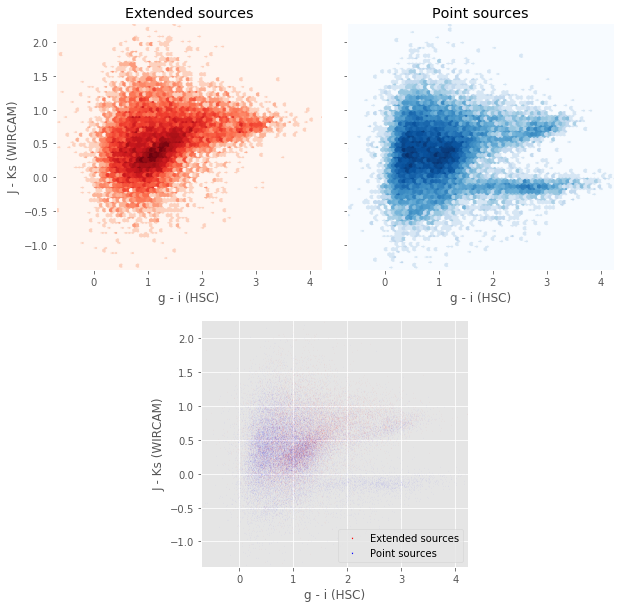

In [20]:
nb_ccplots(
    master_catalogue['m_suprime_g'] - master_catalogue['m_suprime_i'],
    master_catalogue['m_wircam_j'] - master_catalogue['m_wircam_ks'],
    "g - i (HSC)", "J - Ks (WIRCAM)",
    master_catalogue["stellarity"]
)

Number of source used: 49791 / 1412613 (3.52%)


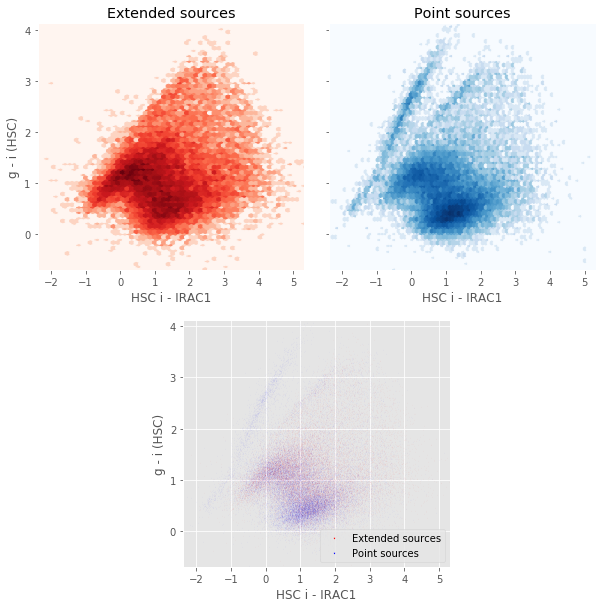

In [21]:
nb_ccplots(
    master_catalogue['m_suprime_i'] - master_catalogue['m_irac_i1'],
    master_catalogue['m_suprime_g'] - master_catalogue['m_suprime_i'],
    "HSC i - IRAC1", "g - i (HSC)",
    master_catalogue["stellarity"]
)

Number of source used: 496561 / 1412613 (35.15%)


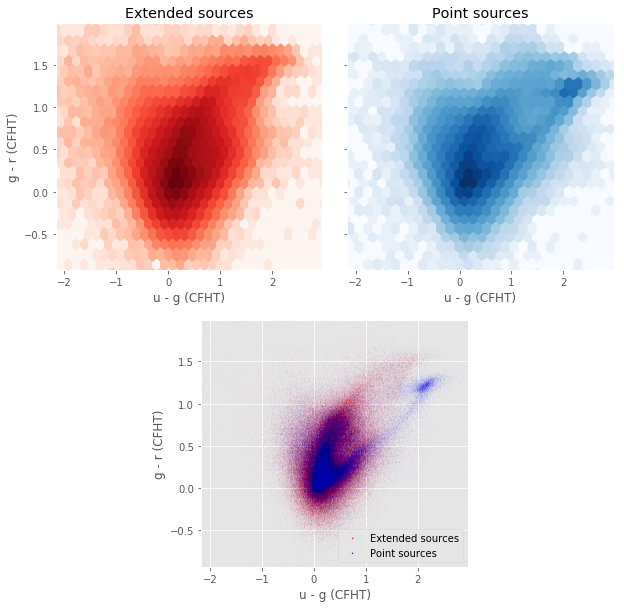

In [22]:
nb_ccplots(
    master_catalogue['m_megacam_u'] - master_catalogue['m_megacam_g'],
    master_catalogue['m_megacam_g'] - master_catalogue['m_megacam_r'],
    "u - g (CFHT)", "g - r (CFHT)",
    master_catalogue["stellarity"]
)

Number of source used: 42964 / 1412613 (3.04%)


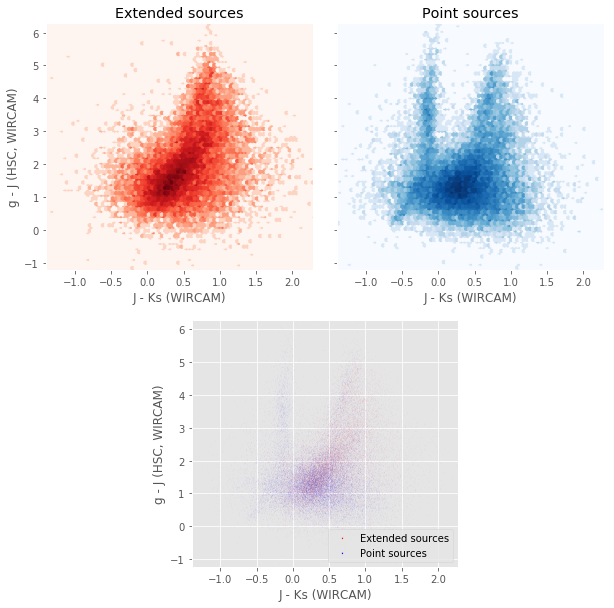

In [23]:
nb_ccplots(
    master_catalogue['m_wircam_j'] - master_catalogue['m_wircam_ks'],
    master_catalogue['m_suprime_g'] - master_catalogue['m_wircam_j'],
    "J - Ks (WIRCAM)", "g - J (HSC, WIRCAM)",
    master_catalogue["stellarity"]
)

Number of source used: 62946 / 1412613 (4.46%)


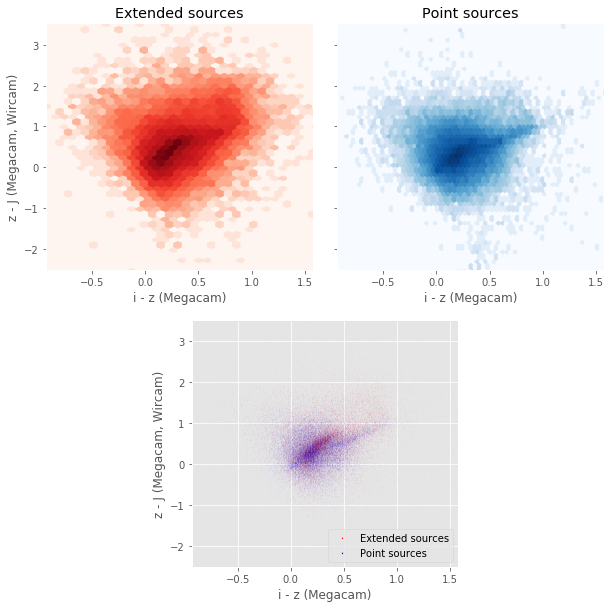

In [24]:
nb_ccplots(
    master_catalogue['m_megacam_i'] - master_catalogue['m_megacam_z'],
    master_catalogue['m_megacam_z'] - master_catalogue['m_wircam_j'],
    "i - z (Megacam)", "z - J (Megacam, Wircam)",
    master_catalogue["stellarity"]
)

Number of source used: 25853 / 1412613 (1.83%)


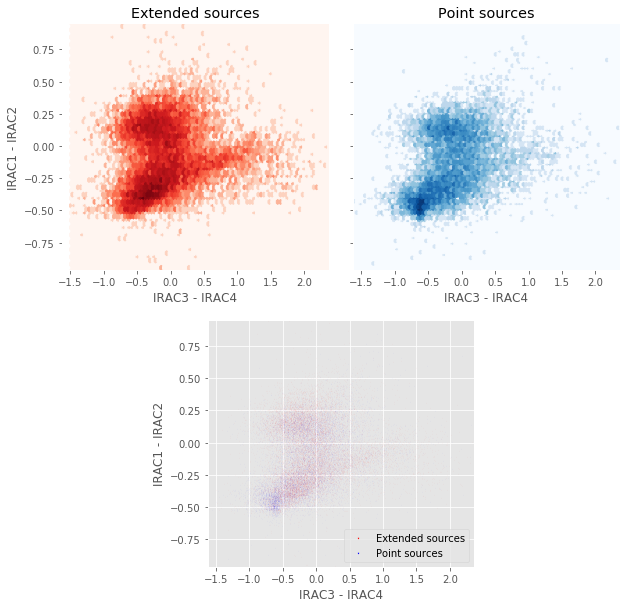

In [25]:
nb_ccplots(
    master_catalogue['m_irac_i3'] - master_catalogue['m_irac_i4'],
    master_catalogue['m_irac_i1'] - master_catalogue['m_irac_i2'],
    "IRAC3 - IRAC4", "IRAC1 - IRAC2",
    master_catalogue["stellarity"]
)